# Визуализация полученных данных

## Загрузка данных

Визуализация данных так устроена, что необходимо указывать год сбора данных, за который необходимо получить визуализацию.

In [1]:
import pandas as pd
year = 2017

In [2]:
init_data_of_age_and_sex = pd.read_csv(f'GeneratedData/InitAgeSex-{year}.csv')

In [3]:
df = pd.read_csv(f'GeneratedData/CompleteDataset-{year}.csv')

In [4]:
by_country = pd.read_csv(f'GeneratedData/ByCountries-{year}.csv')

In [5]:
by_region = pd.read_csv(f'GeneratedData/ByRegions-{year}.csv')

In [6]:
by_people = pd.read_csv(f'GeneratedData/ByPeople-{year}.csv')

In [7]:
people = pd.read_csv('GeneratedData/ByPeople-all.csv')

In [8]:
regions = pd.read_csv('GeneratedData/ByRegions-all.csv')

In [9]:
countries = pd.read_csv('GeneratedData/ByCountries-all.csv')

In [10]:
from utils import reg, rename, calc_groups
family_group, marriage_group, women_group, children_group, parents_group, lgbt_group, gender, age = calc_groups(year)

## Импорт графических библиотек

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

solo_pics_size_x = 10
solo_pics_size_y = 10
group_pics_size_x = 15
group_pics_size_y = 15

C:\progs\DANO olympiad\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Загрузка данных о населении РФ по полам и возрастам

In [12]:
rf_stats = pd.read_excel('InitialData/RF population.xlsx').dropna()
#rf_stats = rf_stats.drop(index=0, axis=0).drop(index=1, columns=[f'Unnamed: {i}' for i in range(3, 21)]).dropna()
rf_stats['Возраст (лет)'] = rf_stats['Возраст (лет)'].astype(int)

## Визуализация полученных данных о населении РФ

График: распределение возрастов мужчин в России

In [ ]:
sns.set(style="white", palette="Set2", font_scale=1, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns.barplot(data=rf_stats, x='Возраст (лет)', y='мужчины', palette='winter', alpha=0.5)

## Визулизация данных из изначального датасета

**Сравнение репрезентативаности будет работать только с данными 2017 года, так как было решено, что аналогичные проверки будут бессмысленны**

График: распределение возрастов мужчин в изначальных данных

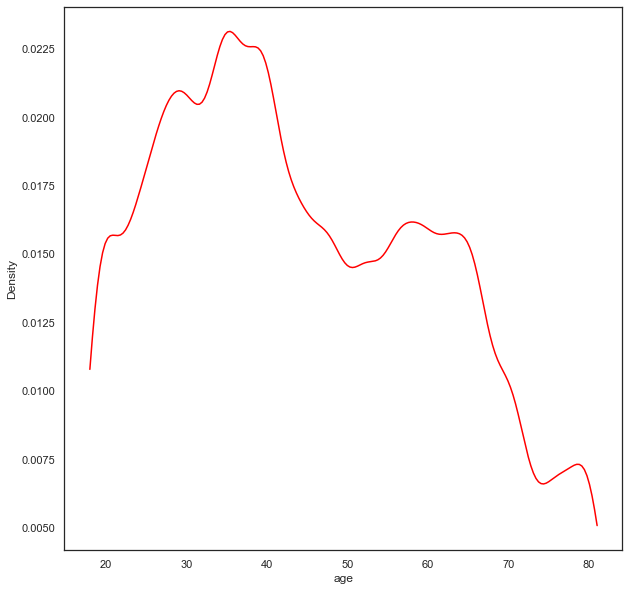

In [14]:
if year == 2017:
    sns.kdeplot(data=init_data_of_age_and_sex[(init_data_of_age_and_sex['age'] < 82) & (init_data_of_age_and_sex['country'] == 643)], x='age', bw_method=0.1, cut=0, color='red')

## Изменилась ли выборка после исключения невалидных значений

График: левый: распределение возрастов мужчин в обработанных данных, правый: распределение возрастов мужчин в изначальных данных

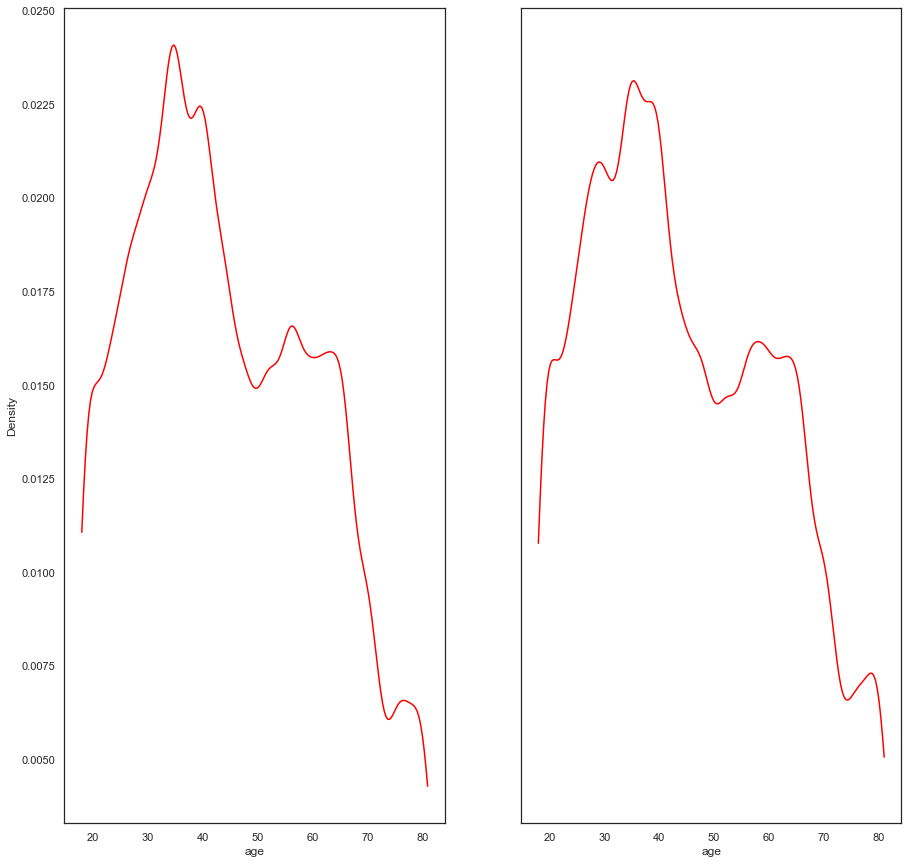

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(group_pics_size_x, group_pics_size_y), sharex='all', sharey='all')
sns.kdeplot(data=df[(df['age'] < 82) & (df['country'] == 643)], x='age', bw_method=0.1, cut=0, color='red', ax=axes[0])
if year == 2017:
    sns.kdeplot(data=init_data_of_age_and_sex[(init_data_of_age_and_sex['age'] < 82) & (init_data_of_age_and_sex['country'] == 643)], x='age', bw_method=0.1, cut=0, color='red', ax=axes[1])

График: распределение возрастов мужчин в изначальных данных

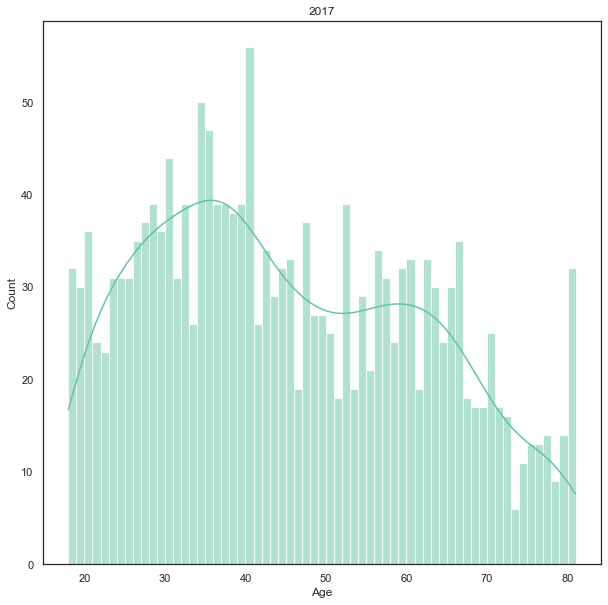

In [16]:
if year == 2017:
    #sns.violinplot(data=init_data_of_age_and_sex, x="age", binwidth=1, stat="density", common_norm=False, hue=gender[0], multiple='dodge', alpha=1, palette='Set2')
    #sns_plot = sns.violinplot(data=init_data_of_age_and_sex, y=, x="age", hue='v225', split=True, bw=.05)
    sns_plot = sns.histplot(data=init_data_of_age_and_sex[(init_data_of_age_and_sex['age'] < 82) & (init_data_of_age_and_sex['country'] == 643)], x='age', binwidth=1, multiple='dodge',
                            kde=True, palette='autumn')
    sns_plot.set_title(year)
    sns_plot.set_xlabel("Age")


## Сравнение соотношения мужчин и женщин

График: сравнение количества мужчин и женщин в обработанных данных


([<matplotlib.patches.Wedge at 0x1f52ee095a0>,
 [Text(0.17850532455732804, 1.0854196649705048, ''),
  Text(-0.17850532455732843, -1.0854196649705048, '')],
 [Text(0.09736654066763346, 0.5920470899839116, '45%'),
  Text(-0.09736654066763367, -0.5920470899839116, '55%')])

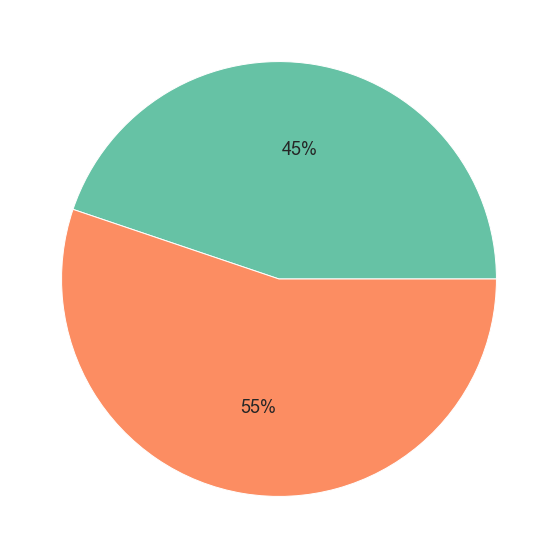

In [17]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.5, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
plt.pie([df[df[gender[0]] == 1].shape[0], df[df[gender[0]] == 2].shape[0]], autopct='%.0f%%')

График: сравнение количества мужчин и женщин в изначальных данных

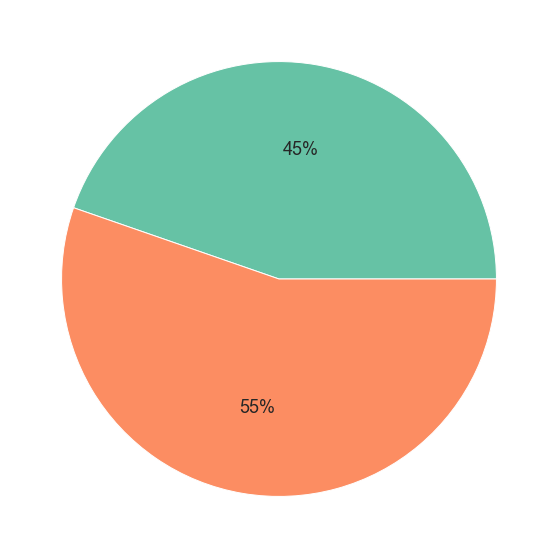

In [18]:
if year == 2017:
    sns.set(style="whitegrid", palette="Set2", font_scale=1.5)
    plt.pie([init_data_of_age_and_sex[init_data_of_age_and_sex[gender[0]] == 1].shape[0], init_data_of_age_and_sex[init_data_of_age_and_sex[gender[0]] == 2].shape[0]], autopct='%.0f%%')

График: сравнение количества мужчин и женщин в данных о населении РФ

([<matplotlib.patches.Wedge at 0x1f52df52290>,
 [Text(0.14676383856060754, 1.0901652974163853, ''),
  Text(-0.14676383856060743, -1.0901652974163853, '')],
 [Text(0.08005300285124047, 0.5946356167725738, '46%'),
  Text(-0.08005300285124041, -0.5946356167725738, '54%')])

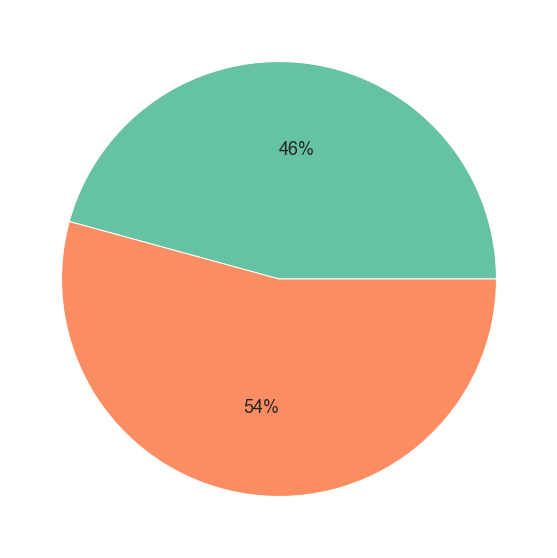

In [19]:
import numpy as np
suma = rf_stats['женщины'].sum() + rf_stats['мужчины'].sum()
women = float(rf_stats['женщины'].sum().astype(float) / suma * 100)
men = float(rf_stats['мужчины'].sum().astype(float) / suma * 100)
#plt.pie(o, t, autopct='%.0f%%')
plt.pie(np.array([men, women]), autopct='%.0f%%')

Вывод: выборка после обработки репрезентативна

## Таблица корреляции между выбранными вопросами

<AxesSubplot:>

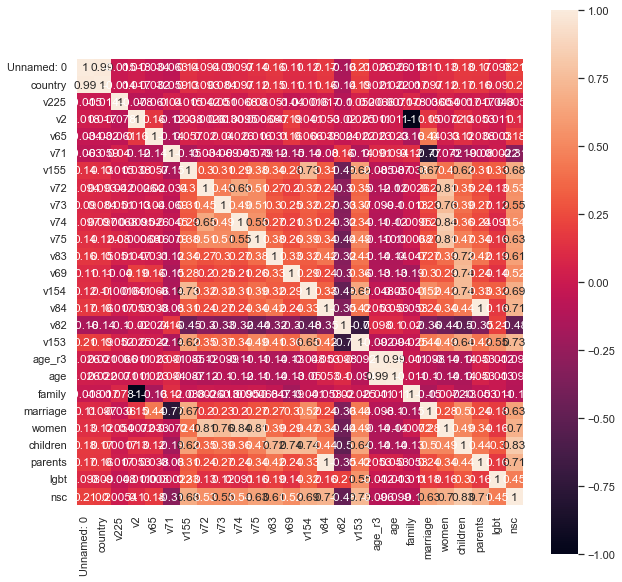

In [20]:
sns.set(font_scale=1, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns.heatmap(df.corr(), annot=True, square=True)

## Распределение индекса НСЦ(Новых Семейных Ценностей) по России и регионам Европы за конкретный год

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Text(0.5, 0.98, '2017')

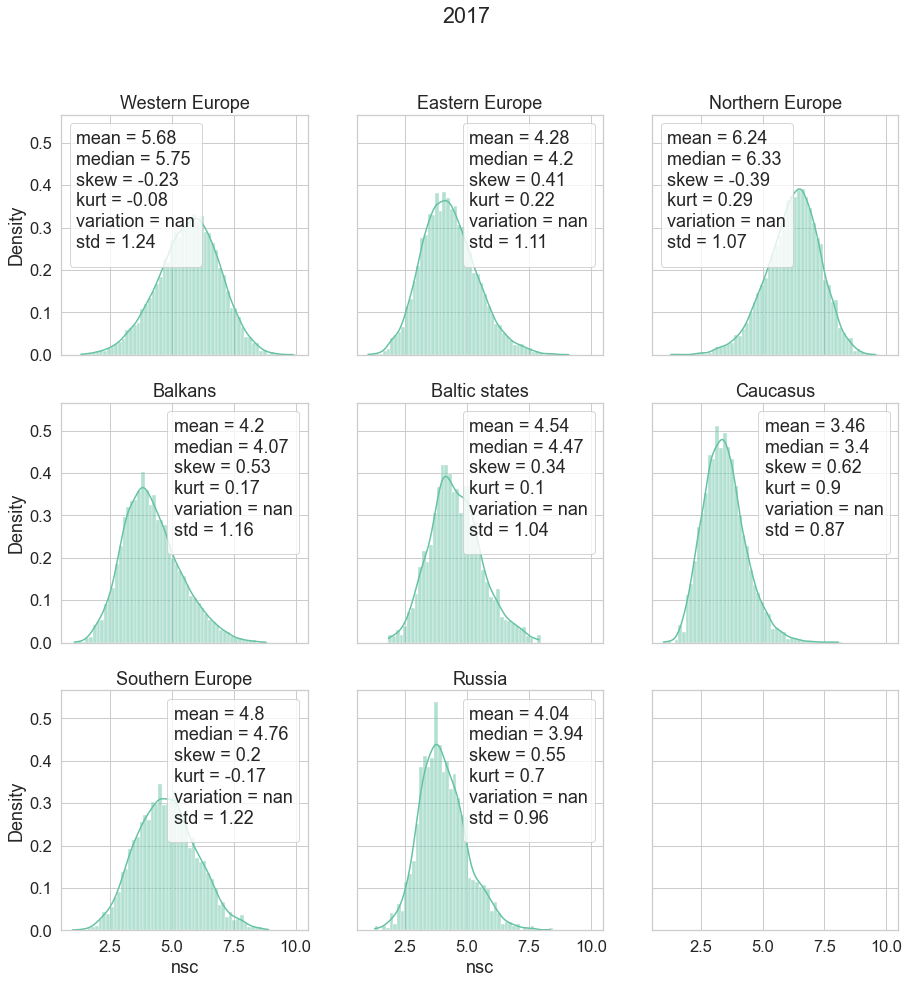

In [21]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.5)

cau = by_people[by_people.region == 'Cau']
ws = by_people[by_people.region == 'West']
ea = by_people[by_people.region == 'East']
sth = by_people[by_people.region == 'South']
nth = by_people[by_people.region == 'North']
bl = by_people[by_people.region == 'Balc']
bt = by_people[by_people.region == 'Balt']
ru = by_people[by_people.country == 643]

fig, axes = plt.subplots(3, 3, figsize=(group_pics_size_x, group_pics_size_y), sharex='all', sharey='all')


def var(region):
    return float(by_region[by_region.region == region].nsc_variation.values[0])


axes[0][0].set_title('Western Europe')
axes[0][0].legend(title=
                  f'mean = {float(round(ws.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(ws.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(ws.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(ws.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(var("West"), 2))}' + '\n' +
                  f'std = {float(round(ws.nsc.std(), 2))}')

axes[0][1].set_title('Eastern Europe')
axes[0][1].legend(title=
                  f'mean = {float(round(ea.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(ea.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(ea.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(ea.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(var("East"), 2))}' + '\n' +
                  f'std = {float(round(ea.nsc.std(), 2))}')

axes[0][2].set_title('Northern Europe')
axes[0][2].legend(title=
                  f'mean = {float(round(nth.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(nth.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(nth.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(nth.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(var("North"), 2))}' + '\n' +
                  f'std = {float(round(nth.nsc.std(), 2))}')

axes[1][0].set_title('Balkans')
axes[1][0].legend(title=
                  f'mean = {float(round(bl.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(bl.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(bl.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(bl.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(var("Balc"), 2))}' + '\n' +
                  f'std = {float(round(bl.nsc.std(), 2))}')

axes[1][1].set_title('Baltic states')
axes[1][1].legend(title=
                  f'mean = {float(round(bt.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(bt.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(bt.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(bt.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(var("Balt"), 2))}' + '\n' +
                  f'std = {float(round(bt.nsc.std(), 2))}')

axes[1][2].set_title('Caucasus')
if year != 1999:
    axes[1][2].legend(title=
                      f'mean = {float(round(cau.nsc.mean(), 2))}' + '\n' +
                      f'median = {float(round(cau.nsc.median(), 2))}' + '\n' +
                      f'skew = {float(round(cau.nsc.skew(), 2))}' + '\n' +
                      f'kurt = {float(round(cau.nsc.kurtosis(), 2))}' + '\n' +
                      f'variation = {float(round(var("Cau"), 2))}' + '\n' +
                      f'std = {float(round(cau.nsc.std(), 2))}')

axes[2][0].set_title('Southern Europe')
axes[2][0].legend(title=
                  f'mean = {float(round(sth.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(sth.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(sth.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(sth.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(var("South"), 2))}' + '\n' +
                  f'std = {float(round(sth.nsc.std(), 2))}')

axes[2][1].set_title('Russia')
v = by_country[by_country.country == 643].nsc_variation.values[0]
axes[2][1].legend(title=
                  f'mean = {float(round(ru.nsc.mean(), 2))}' + '\n' +
                  f'median = {float(round(ru.nsc.median(), 2))}' + '\n' +
                  f'skew = {float(round(ru.nsc.skew(), 2))}' + '\n' +
                  f'kurt = {float(round(ru.nsc.kurtosis(), 2))}' + '\n' +
                  f'variation = {float(round(v, 2))}' + '\n' +
                  f'std = {float(round(ru.nsc.std(), 2))}')

sns.histplot(data=ws, ax=axes[0][0], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=ea, ax=axes[0][1], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=nth, ax=axes[0][2], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=bl, ax=axes[1][0], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=bt, ax=axes[1][1], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=cau, ax=axes[1][2], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=sth, ax=axes[2][0], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=ru, ax=axes[2][1], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
fig.suptitle(year)


## Сравнение распределение индекса НСЦ(Новых Семейных Ценностей) в России, Западной и Северной Европах

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, '2017')

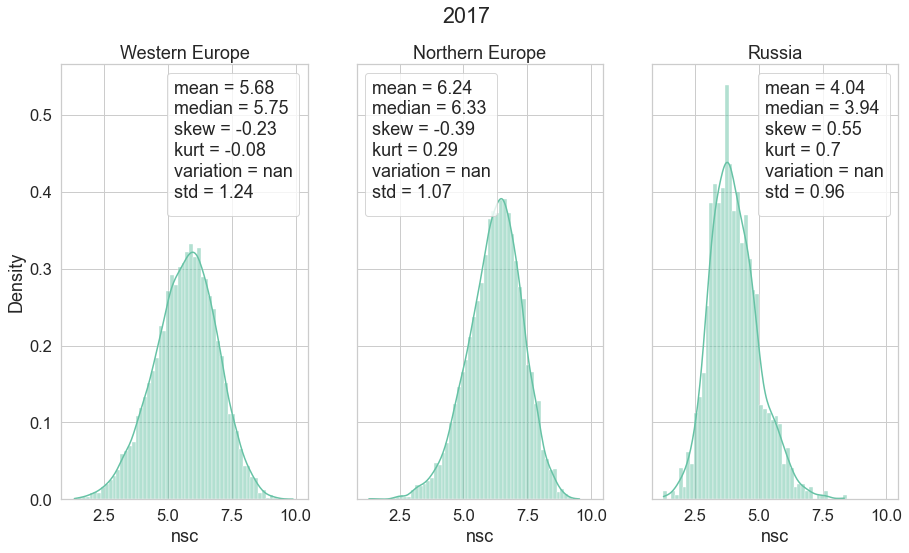

In [22]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.5)

ws = df[df.region == 'West']
nth = df[df.region == 'North']
ru = df[df.country == 643]

fig, axes = plt.subplots(1, 3, figsize=(group_pics_size_x, 8), sharex='all', sharey='all')


def var(region):
    return float(by_region[by_region.region == region].nsc_variation.values[0])


axes[0].set_title('Western Europe')
axes[0].legend(title=
               f'mean = {float(round(ws.nsc.mean(), 2))}' + '\n' +
               f'median = {float(round(ws.nsc.median(), 2))}' + '\n' +
               f'skew = {float(round(ws.nsc.skew(), 2))}' + '\n' +
               f'kurt = {float(round(ws.nsc.kurtosis(), 2))}' + '\n' +
               f'variation = {float(round(var("West"), 2))}' + '\n' +
               f'std = {float(round(ws.nsc.std(), 2))}')

axes[1].set_title('Northern Europe')
axes[1].legend(title=
               f'mean = {float(round(nth.nsc.mean(), 2))}' + '\n' +
               f'median = {float(round(nth.nsc.median(), 2))}' + '\n' +
               f'skew = {float(round(nth.nsc.skew(), 2))}' + '\n' +
               f'kurt = {float(round(nth.nsc.kurtosis(), 2))}' + '\n' +
               f'variation = {float(round(var("North"), 2))}' + '\n' +
               f'std = {float(round(nth.nsc.std(), 2))}')

axes[2].set_title('Russia')
v = by_country[by_country.country == 643].nsc_variation.values[0]
axes[2].legend(title=
               f'mean = {float(round(ru.nsc.mean(), 2))}' + '\n' +
               f'median = {float(round(ru.nsc.median(), 2))}' + '\n' +
               f'skew = {float(round(ru.nsc.skew(), 2))}' + '\n' +
               f'kurt = {float(round(ru.nsc.kurtosis(), 2))}' + '\n' +
               f'variation = {float(round(v, 2))}' + '\n' +
               f'std = {float(round(ru.nsc.std(), 2))}')

sns.histplot(data=ws, ax=axes[0], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=nth, ax=axes[1], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
sns.histplot(data=ru, ax=axes[2], x="nsc", binwidth=0.15, stat="density", common_norm=False, kde=True)
fig.suptitle(year)


## Индекс НСЦ(Новых Семейных Ценностей) за конкретный год по странам

Text(0, 0.5, 'Country')

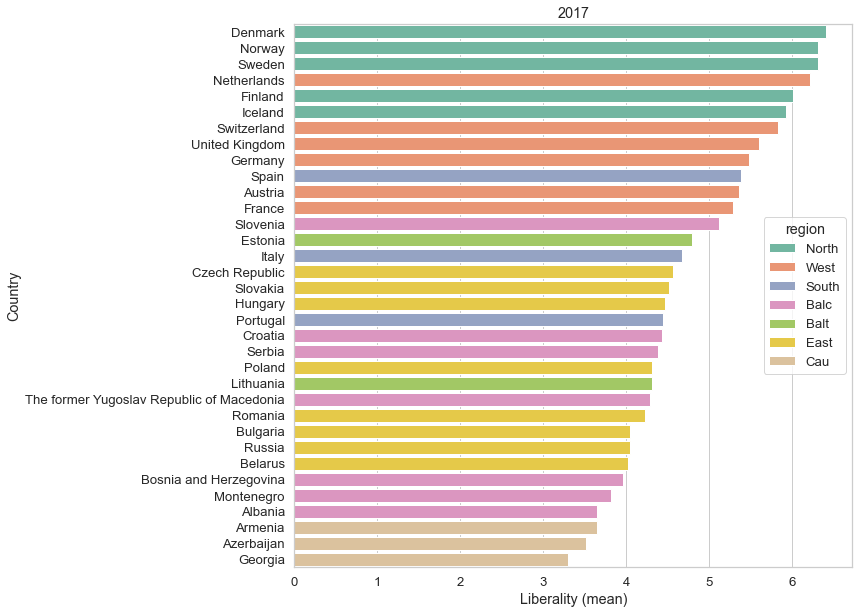

In [23]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
#plt.xticks(rotation=90)
#sns.set(font_scale = 2)
sns_plot = sns.barplot(orient='h', x=by_country.nsc_mean, y=by_country['name'],
                       order=by_country.sort_values(by='nsc_mean', ascending=False).name,
                       hue=by_country.sort_values(by='nsc_mean', ascending=False).region, dodge=False)
#sns_plot.figure.savefig("output.png")
sns_plot.set_title(year)
sns_plot.set_xlabel("Liberality (mean)")
sns_plot.set_ylabel("Country")

## Значение индекса значимости семьи в странах Европы за конкретный год

Text(0, 0.5, 'Country')

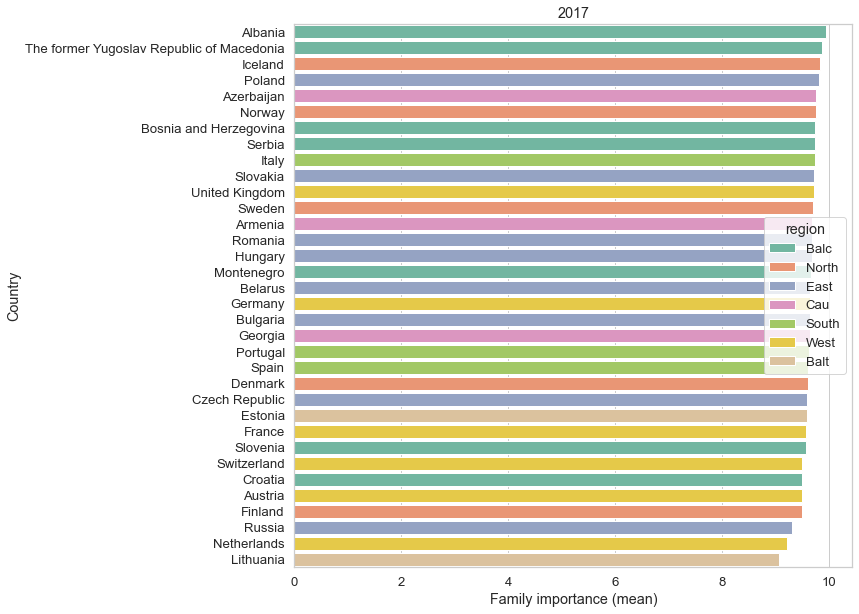

In [24]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(orient='h', x=by_country.family_mean, y=by_country['name'],
                       order=by_country.sort_values(by='family_mean', ascending=False).name,
                       hue=by_country.sort_values(by='family_mean', ascending=False).region, dodge=False)
sns_plot.set_title(year)
sns_plot.set_xlabel("Family importance (mean)")
sns_plot.set_ylabel("Country")

## Зависимость индекса значимости семьи от индекса НСЦ(Новых Семейных Ценностей)

-0.1894207272097938

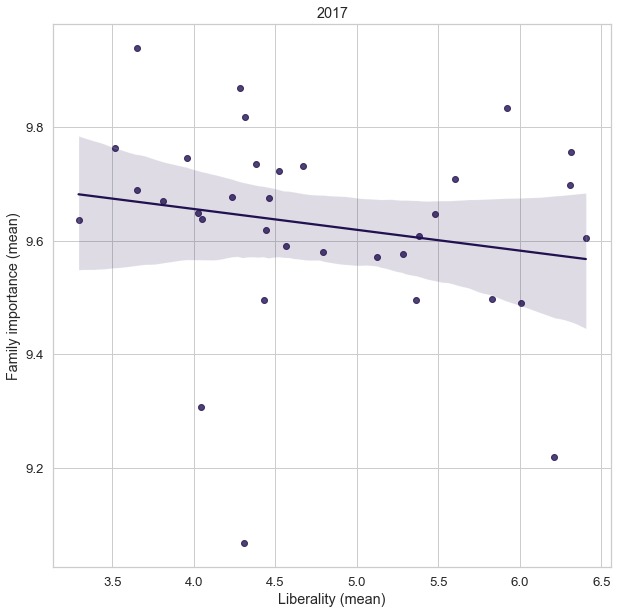

In [25]:
#sns.scatterplot(data=by_country, x="nsc_mean", y="family_mean", hue='region', s=100)
sns.set(style="whitegrid", palette="magma", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.regplot(data=by_country, x="nsc_mean", y="family_mean",
                       #lowess=True,
                       #scatter_kws={"color": "0.4"},
                       #line_kws={"color": "red"}
                       )
sns_plot.set_title(year)
sns_plot.set_ylabel("Family importance (mean)")
sns_plot.set_xlabel("Liberality (mean)")
by_country['nsc_mean'].corr(by_country['family_mean'])

## Сравнение распределения индекса НСЦ(Новых Семейных Ценностей) в России, Северной и Западной Европах по годам

<AxesSubplot:title={'center':'Russia'}, xlabel='nsc', ylabel='Density'>

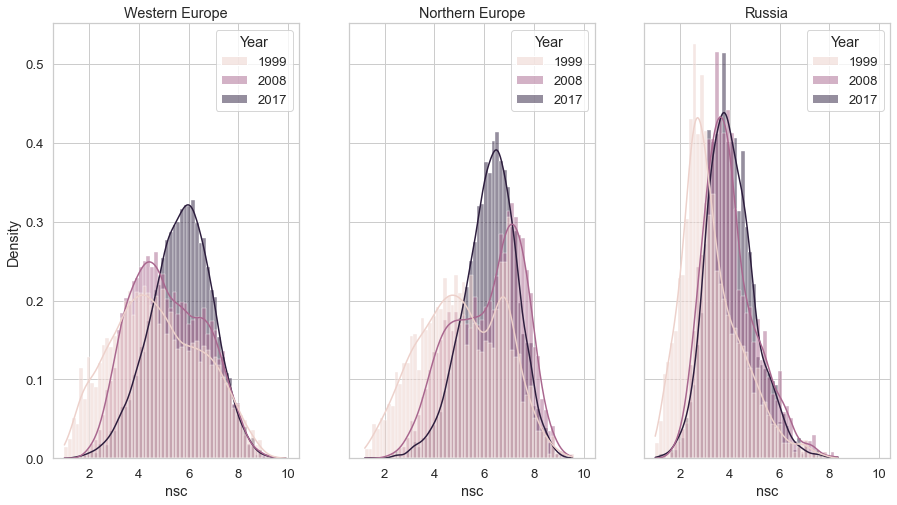

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(group_pics_size_x, 8), sharex='all', sharey='all')

ws = people[people.region == 'West']
nth = people[people.region == 'North']
ru = people[people.country == 643]

axes[0].set_title('Western Europe')
axes[1].set_title('Northern Europe')
axes[2].set_title('Russia')

sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (group_pics_size_x, 8)})

sns.histplot(data=ws, ax=axes[0], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=nth, ax=axes[1], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=ru, ax=axes[2], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)

## Распределения индекса НСЦ(Новых Семейных Ценностей) в регионах Европы по годам

<AxesSubplot:title={'center':'Russia'}, xlabel='nsc', ylabel='Density'>

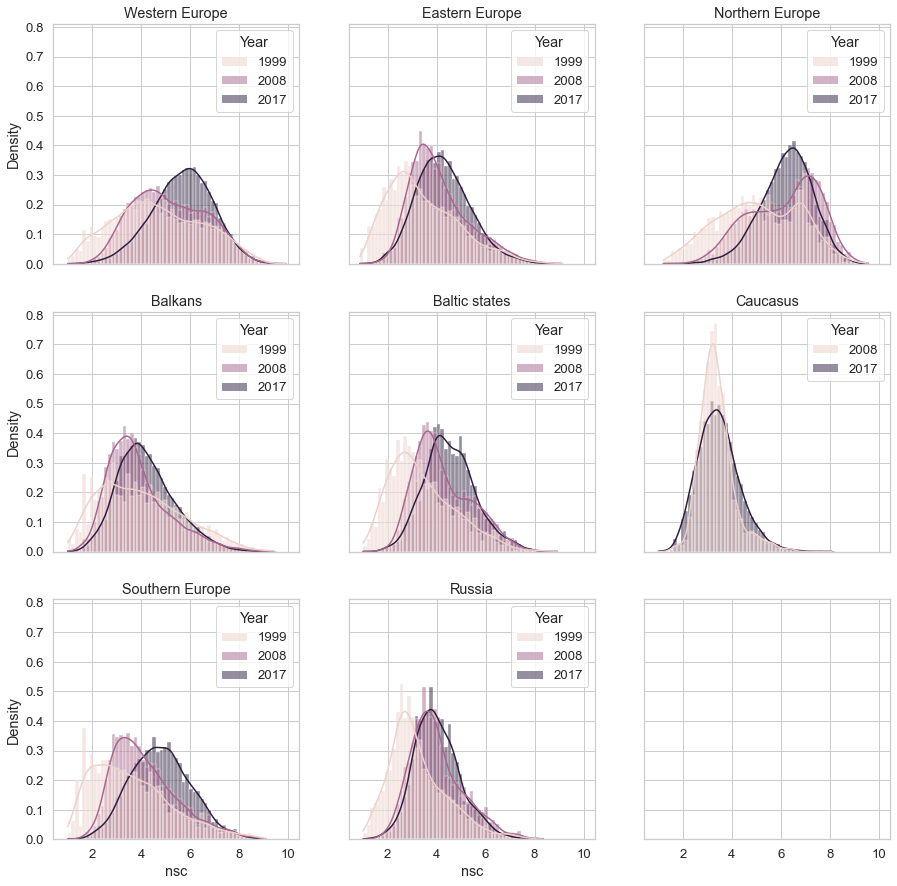

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(group_pics_size_x, group_pics_size_y), sharex='all', sharey='all')

cau = people[people.region == 'Cau']
ws = people[people.region == 'West']
ea = people[people.region == 'East']
sth = people[people.region == 'South']
nth = people[people.region == 'North']
bl = people[people.region == 'Balc']
bt = people[people.region == 'Balt']
ru = people[people.country == 643]

axes[0][0].set_title('Western Europe')
axes[0][1].set_title('Eastern Europe')
axes[0][2].set_title('Northern Europe')
axes[1][0].set_title('Balkans')
axes[1][1].set_title('Baltic states')
axes[1][2].set_title('Caucasus')
axes[2][0].set_title('Southern Europe')
axes[2][1].set_title('Russia')

sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (group_pics_size_x, group_pics_size_y)})

sns.histplot(data=ws, ax=axes[0][0], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=ea, ax=axes[0][1], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=nth, ax=axes[0][2], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=bl, ax=axes[1][0], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=bt, ax=axes[1][1], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=cau, ax=axes[1][2], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=sth, ax=axes[2][0], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)
sns.histplot(data=ru, ax=axes[2][1], x="nsc", binwidth=0.15, stat="density", hue='Year', common_norm=False, kde=True)

## Сравнение распределения индекса НСЦ(Новых Семейных Ценностей) в России, Северной и Западной Европах в 2017 году

C:\progs\DANO olympiad\env\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2017')

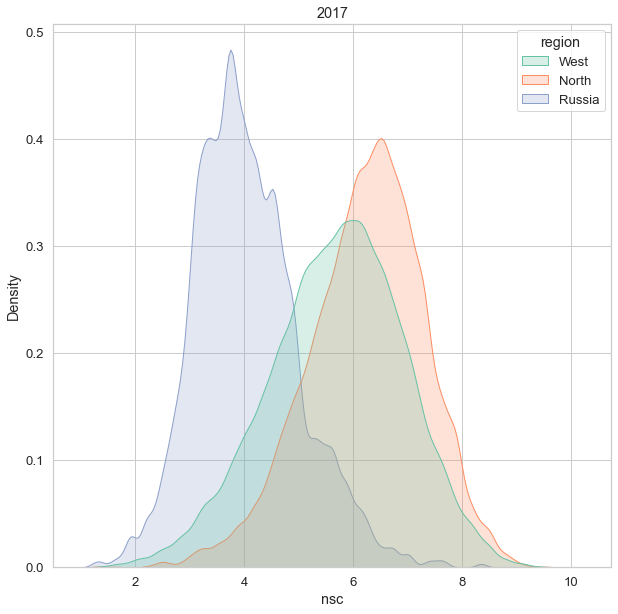

In [28]:
xxx = people[
    (people.Year == 2017) & ((people.region == 'West') | (people.region == 'North') | (people.country == 643))].copy()


def app(data):
    if data == 643:
        return 'Russia'


xxx.loc[xxx.country == 643, 'region'] = 'Russia'
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.kdeplot(data=xxx, fill='True', x="nsc", hue='region', common_norm=False, bw=0.1)
sns_plot.set_title(2017)



## Сравнение динамики индекса НСЦ(Новых Семейных Ценностей) в России, Северной и Восточной Европах по годам

Text(0.5, 0, 'Year')

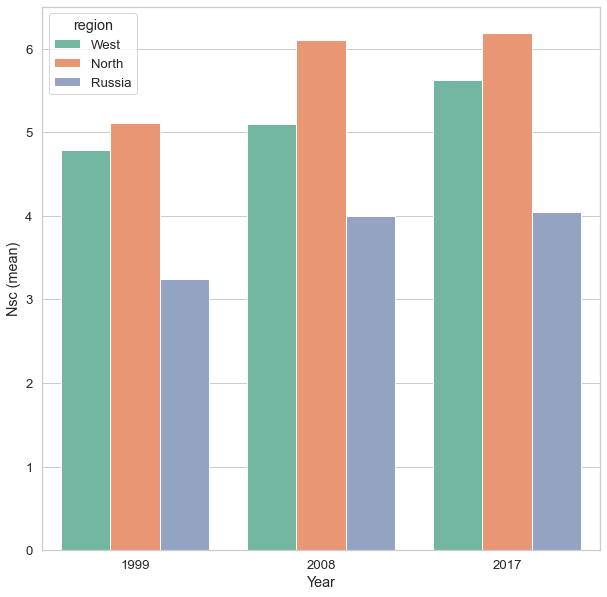

In [29]:
xxx = countries[((countries.region == 'West') | (countries.region == 'North') | (countries.country == 643))].copy()

xxx.loc[xxx.country == 643, 'region'] = 'Russia'

sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(y='nsc_mean', x="Year", data=xxx, hue='region', dodge=True, ci=None)
sns_plot.set_ylabel("Nsc (mean)")
sns_plot.set_xlabel("Year")
#sns_plot.set_ylim(bottom=9.0, top=1770)


## Значения введённых индексов в России

<AxesSubplot:title={'center':'Marriage attitude'}, xlabel='marriage', ylabel='Density'>

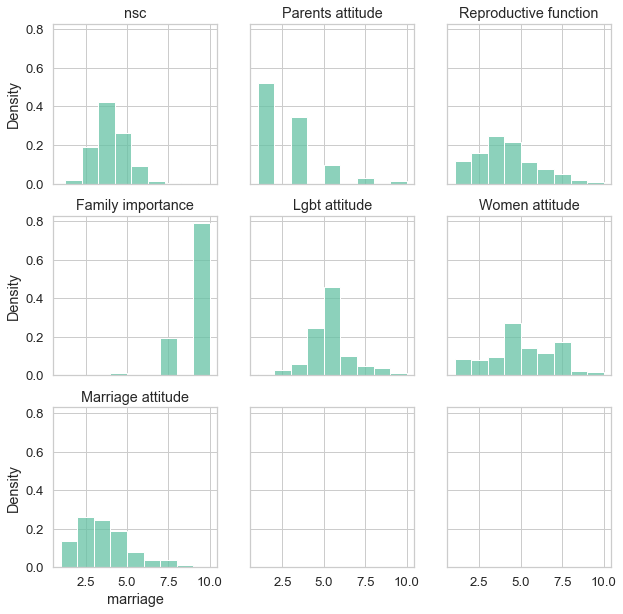

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(solo_pics_size_x, solo_pics_size_y), sharex='all', sharey='all')

ru = people[(people.country == 643) & (people.Year == 2017)]

axes[0][0].set_title('nsc')
axes[0][1].set_title('Parents attitude')
axes[0][2].set_title('Reproductive function')
axes[1][0].set_title('Family importance')
axes[1][1].set_title('Lgbt attitude')
axes[1][2].set_title('Women attitude')
axes[2][0].set_title('Marriage attitude')

sns.histplot(data=ru, ax=axes[0][0], x="nsc", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge")
sns.histplot(data=ru, ax=axes[0][1], x="parents", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge", )
sns.histplot(data=ru, ax=axes[0][2], x="children", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge")
sns.histplot(data=ru, ax=axes[1][0], x="family", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge")
sns.histplot(data=ru, ax=axes[1][1], x="lgbt", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge")
sns.histplot(data=ru, ax=axes[1][2], x="women", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge")
sns.histplot(data=ru, ax=axes[2][0], x="marriage", binwidth=1, stat="density", common_norm=False, kde=False,
             multiple="dodge")


## Распределения индекса значимости семьи в регионах Европы по годам

<AxesSubplot:title={'center':'Russia'}, xlabel='family', ylabel='Density'>

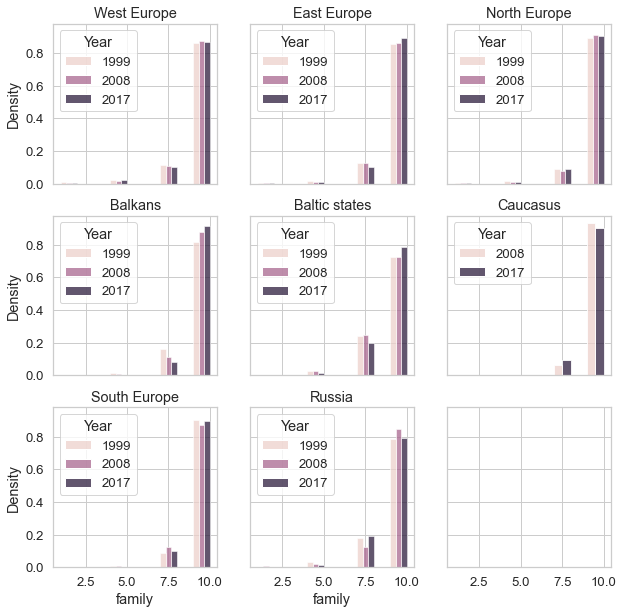

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(solo_pics_size_x, solo_pics_size_y), sharex='all', sharey='all')

cau = people[people.region == 'Cau']
ws = people[people.region == 'West']
ea = people[people.region == 'East']
sth = people[people.region == 'South']
nth = people[people.region == 'North']
bl = people[people.region == 'Balc']
bt = people[people.region == 'Balt']
ru = people[people.country == 643]

axes[0][0].set_title('West Europe')
axes[0][1].set_title('East Europe')
axes[0][2].set_title('North Europe')
axes[1][0].set_title('Balkans')
axes[1][1].set_title('Baltic states')
axes[1][2].set_title('Caucasus')
axes[2][0].set_title('South Europe')
axes[2][1].set_title('Russia')

sns.histplot(data=ws, ax=axes[0][0], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=ea, ax=axes[0][1], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=nth, ax=axes[0][2], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=bl, ax=axes[1][0], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=bt, ax=axes[1][1], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=cau, ax=axes[1][2], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=sth, ax=axes[2][0], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')
sns.histplot(data=ru, ax=axes[2][1], x="family", binwidth=1, stat="density", common_norm=False, hue='Year',
             multiple='dodge')

## Динамика индекса значимости семьи в России по годам

9.241113744075829
9.413259668508289
9.30715935334873


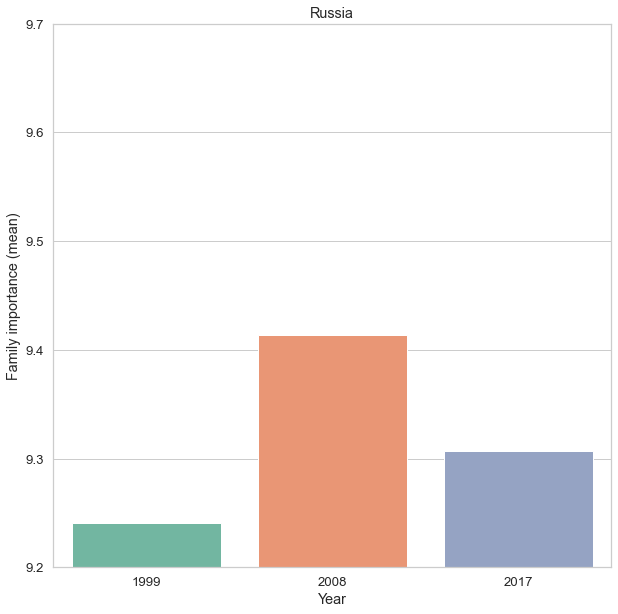

In [32]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(y='family_mean', x="Year", data=countries[countries['country'] == 643], dodge=False)
sns_plot.set_title("Russia")
sns_plot.set_ylabel("Family importance (mean)")
sns_plot.set_xlabel("Year")
sns_plot.set_ylim(bottom=9.2, top=9.7)
print(countries[(countries['country'] == 643) & (countries['Year'] == 1999)]['family_mean'].values[0])
print(countries[(countries['country'] == 643) & (countries['Year'] == 2008)]['family_mean'].values[0])
print(countries[(countries['country'] == 643) & (countries['Year'] == 2017)]['family_mean'].values[0])

## Динамика индекса НСЦ(Новых Семейных Ценностей) в России по годам

(2.5, 6.0)

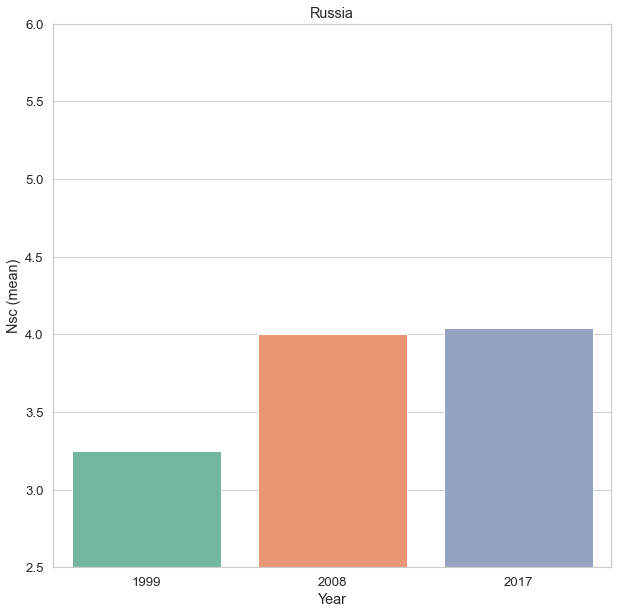

In [33]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(y='nsc_mean', x="Year", data=countries[countries['country'] == 643], dodge=False)
sns_plot.set_title("Russia")
sns_plot.set_ylabel("Nsc (mean)")
sns_plot.set_xlabel("Year")
sns_plot.set_ylim(bottom=2.5, top=6)

## Динамика индекса значимости семьи в Северной и Западной Европах по годам

9.608079071766223
9.689756097560975
9.664802289281996


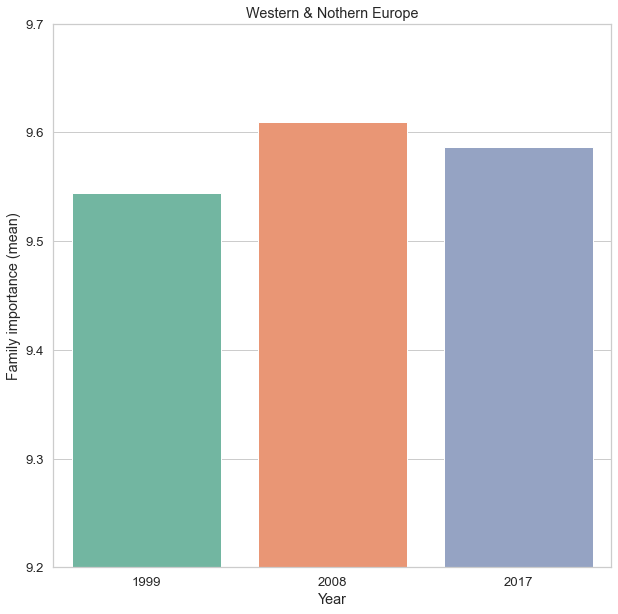

In [34]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(y='family_mean', x="Year",
                       data=regions[(regions['region'] == "West") | (regions['region'] == "North")], dodge=False,
                       ci=None)
sns_plot.set_title("Western & Nothern Europe")
sns_plot.set_ylabel("Family importance (mean)")
sns_plot.set_xlabel("Year")
sns_plot.set_ylim(bottom=9.2, top=9.7)
print(regions[(regions.Year == 1999) & ((regions['region'] == "West") | (regions['region'] == "North"))][
          'family_mean'].values[0])
print(regions[(regions.Year == 2008) & ((regions['region'] == "West") | (regions['region'] == "North"))][
          'family_mean'].values[0])
print(regions[(regions.Year == 2017) & ((regions['region'] == "West") | (regions['region'] == "North"))][
          'family_mean'].values[0])

## Динамика индекса НСЦ(Новых Семейных Ценностей) в Северной и Западной Европах по годам

(2.5, 6.0)

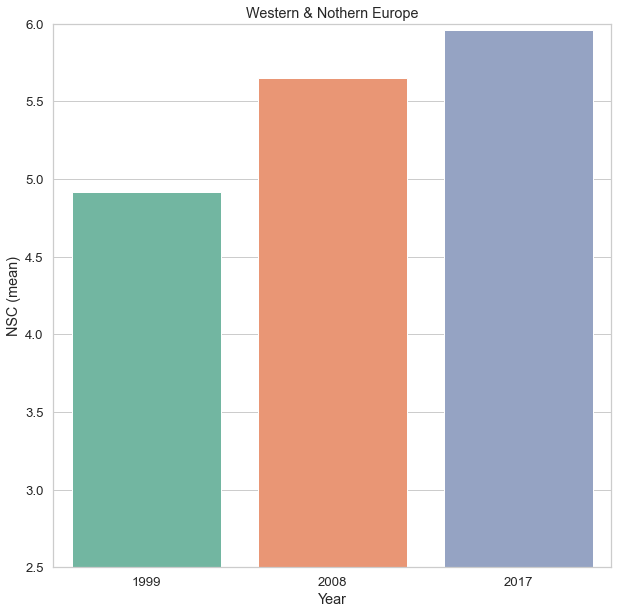

In [35]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(y='nsc_mean', x="Year",
                       data=regions[(regions['region'] == "West") | (regions['region'] == "North")], dodge=False,
                       ci=None)
sns_plot.set_title("Western & Nothern Europe")
sns_plot.set_ylabel("NSC (mean)")
sns_plot.set_xlabel("Year")
sns_plot.set_ylim(bottom=2.5, top=6)

## Динамика индекса НСЦ(Новых Семейных Ценностей) в России по годам

<AxesSubplot:xlabel='Year', ylabel='nsc_mean'>

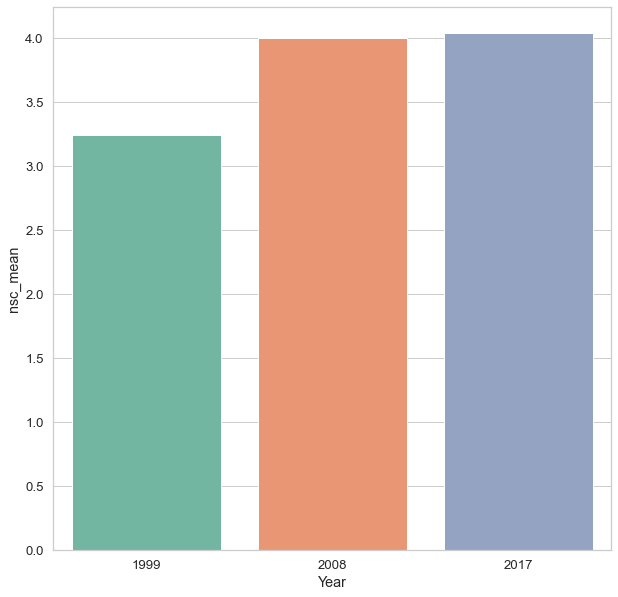

In [36]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns.barplot(y='nsc_mean', x="Year", data=countries[countries['country'] == 643], dodge=False)

## Изменение индекса НСЦ(Новых Семейных Ценностей) в странах Европы с 1999 по 2017

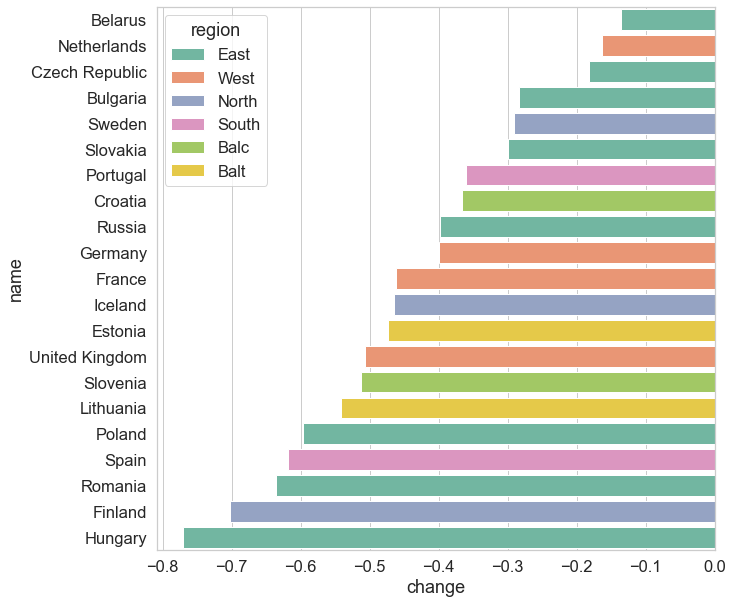

In [37]:
group = countries.groupby('country').nsc_mean.agg(lambda x: list(x)).to_frame().reset_index()
split = pd.DataFrame(group['nsc_mean'].to_list())
group = pd.concat([group, split], axis=1)
group = group.drop('nsc_mean', axis=1)
group.dropna(inplace=True)

group['change'] = ((group[0] - group[1]) + (group[1] - group[2])) / 2
group['name'] = group['country'].apply(rename)
group['region'] = group['country'].apply(reg)
group.reset_index(drop=True)
sns.set(style="whitegrid", palette="Set2", font_scale=1.5, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns_plot = sns.barplot(orient='h', x=group.change, y=group.name,
                       order=group.sort_values(by='change', ascending=False).name,
                       hue=group.sort_values(by='change', ascending=False).region, dodge=False)


## Изменение индекса НСЦ(Новых Семейных Ценностей) в регионах Европы с 1999 по 2017

C:\Users\Святослав\AppData\Local\Temp\ipykernel_14300\2521804571.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group1 = group1.append(group[group.name == 'Russia'])


<AxesSubplot:xlabel='change', ylabel='region'>

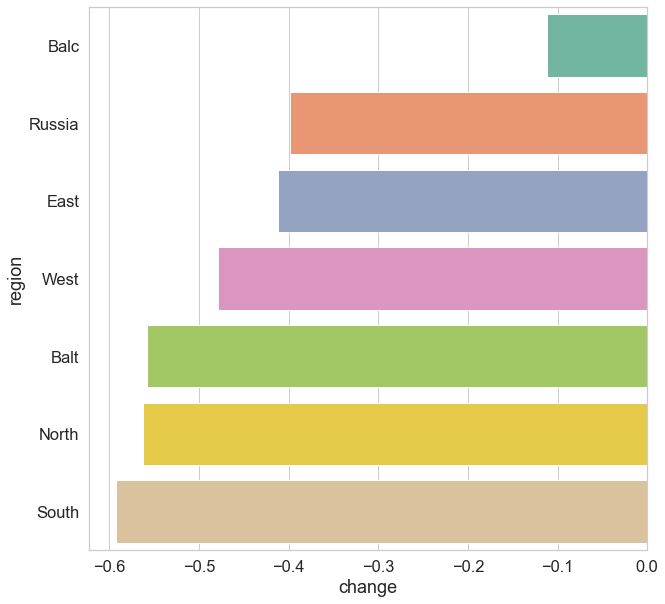

In [38]:
group1 = regions.groupby('region').nsc_mean.agg(lambda x: list(x)).to_frame().reset_index()
split = pd.DataFrame(group1['nsc_mean'].to_list())

group1 = pd.concat([group1, split], axis=1)
group1 = group1.drop('nsc_mean', axis=1)
group1.dropna(inplace=True)
group1['change'] = ((group1[0] - group1[1]) + (group1[1] - group1[2])) / 2
group1.reset_index(drop=True)
group1 = group1.append(group[group.name == 'Russia'])
group1.loc[group1.name == 'Russia', 'region'] = 'Russia'
sns.set(style="whitegrid", palette="Set2", font_scale=1.5, rc={'figure.figsize': (solo_pics_size_x, solo_pics_size_y)})
sns.barplot(ci=None, orient='h', x=group1.change, y=group1.region,
                       order=group1.sort_values(by='change', ascending=False).region, dodge=False)


## t test

Этот фрагмент запустится только при наличии файлов: GeneratedData/TTestData-{1 или 2}.xlsx
Эти файлы не были сгенерированы выше

In [41]:
import scipy as sp
import numpy as np
from math import sqrt

# Magic values territory. No trespassing!
for i in 0, 1:
    d = pd.read_excel(f'GeneratedData/TTestData-{i+1}.xlsx')
    print(f'Test {i+1}')
    n1, n2 = 1299, 1688
    if i == 1:
        n1, n2 = 6730, 2327
    mean1, mean2 = d.data1.mean(), d.data2.mean()
    # Standard deviation evaluation
    std1, std2 = d.data1.std(ddof=1), d.data2.std(ddof=1)
    # Standard error evaluation
    se1, se2 = (std1 / n1), (std2 / n2)
    # Standard error of the difference between the means evaluation
    sed = sqrt(se1 ** 2.0 + se2 ** 2.0)

    # T-statistic evaluation
    t_stat = (mean1 - mean2) / sqrt(se1 + se2)
    # Degrees of freedom
    df = n1 + n2 - 2

    # Critical value evaluation
    alpha = 0.05
    cv = sp.stats.halfgennorm.ppf(1.0 - alpha, df)

    # P-value evaluation
    p = (1 - sp.stats.halfgennorm.cdf(abs(t_stat), df)) * 2
    print(f'T-statistic: {t_stat}, Degrees of freedom: {df}, Critical value: {cv}, P-value: {p}')
    confidence = 0.95
    a = d.data1.array
    z = d.data1.apply(lambda data: data - mean1).mean() / (std1 / sqrt(n1))

    # Margin of error evaluation
    h, se = np.mean(a), sp.stats.sem(a)
    m = se * sp.stats.halfgennorm.ppf((1 + confidence) / 2., n1 - 1)
    #m = z * std1/ sqrt(n1)
    print(f'Mean data1 value: {h}, Margin of error: {m}')
    print(f'(mean1 - mean2 - cv * m): {(mean1 - mean2 - cv * m)}, (mean1 - mean2 + cv * m): {(mean1 - mean2 + cv * m)}')
    print(f'((mean1 - mean2 - cv * m) + (mean1 - mean2 + cv * m)) / 2: {((mean1 - mean2 - cv * m) + (mean1 - mean2 + cv * m)) / 2}')
    sp.stats.halfgennorm.cdf(abs(t_stat), df)


Test 1
T-statistic: -1.4555899744489191, Degrees of freedom: 2985, Critical value: 0.9498164019418974, P-value: 0.0
h: 9.241113744075829, Margin of error: 0.0375205118914876
(mean1 - mean2 - cv * m): -0.1016832068766923, (mean1 - mean2 + cv * m): -0.030408011669110446
((mean1 - mean2 - cv * m) + (mean1 - mean2 + cv * m)) / 2: -0.06604560927290137
Test 2
T-statistic: -4.7025432615444815, Degrees of freedom: 9055, Critical value: 0.949939453216351, P-value: 0.0
h: 9.480683506686479, Margin of error: 0.01689607313680343
(mean1 - mean2 - cv * m): -0.14344581155682323, (mean1 - mean2 + cv * m): -0.11134531860266617
((mean1 - mean2 - cv * m) + (mean1 - mean2 + cv * m)) / 2: -0.1273955650797447


C:\progs\DANO olympiad\env\lib\site-packages\scipy\stats\_continuous_distns.py:8850: RuntimeWarning: overflow encountered in power
  return sc.gammainc(1.0/beta, x**beta)
C:\progs\DANO olympiad\env\lib\site-packages\scipy\stats\_continuous_distns.py:8850: RuntimeWarning: overflow encountered in power
  return sc.gammainc(1.0/beta, x**beta)
